# Unsupervised Learning: Clustering



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


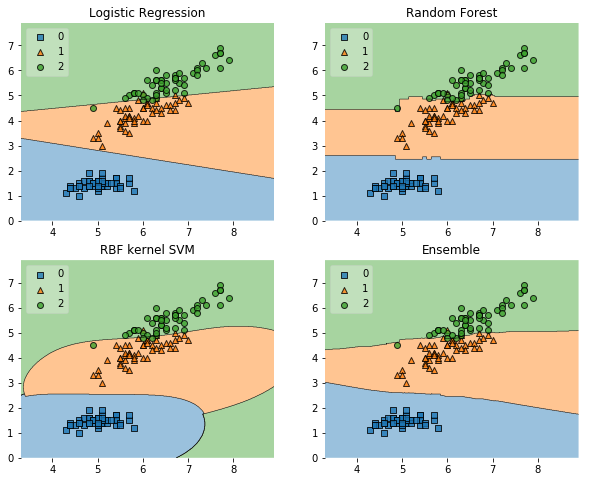

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

***

# Hierarchical Clustering

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
from sklearn.datasets.samples_generator import make_blobs

In [0]:
X, y = make_blobs(n_samples=600, centers=5,
                  cluster_std=0.60, random_state=42)

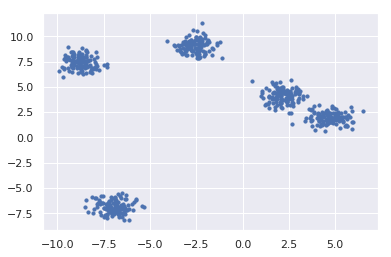

In [0]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [0]:
distance = linkage(X, 'ward')

## Dendrogram

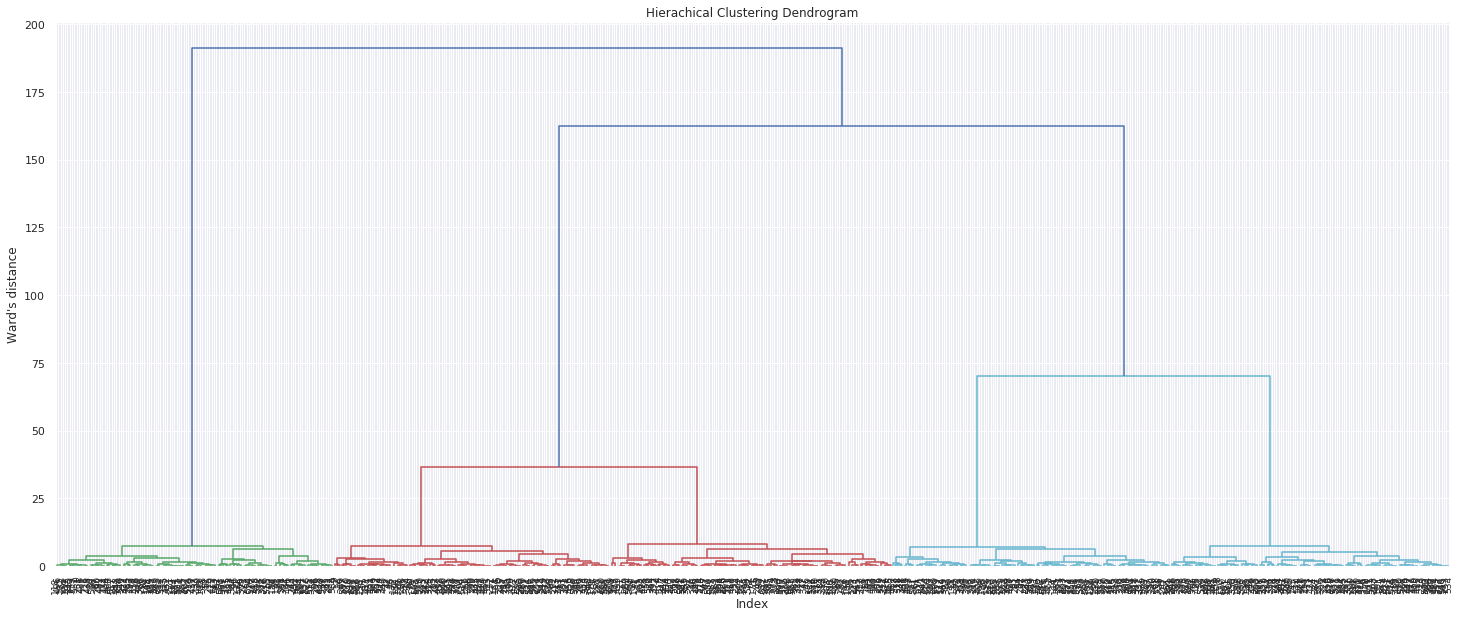

In [0]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);


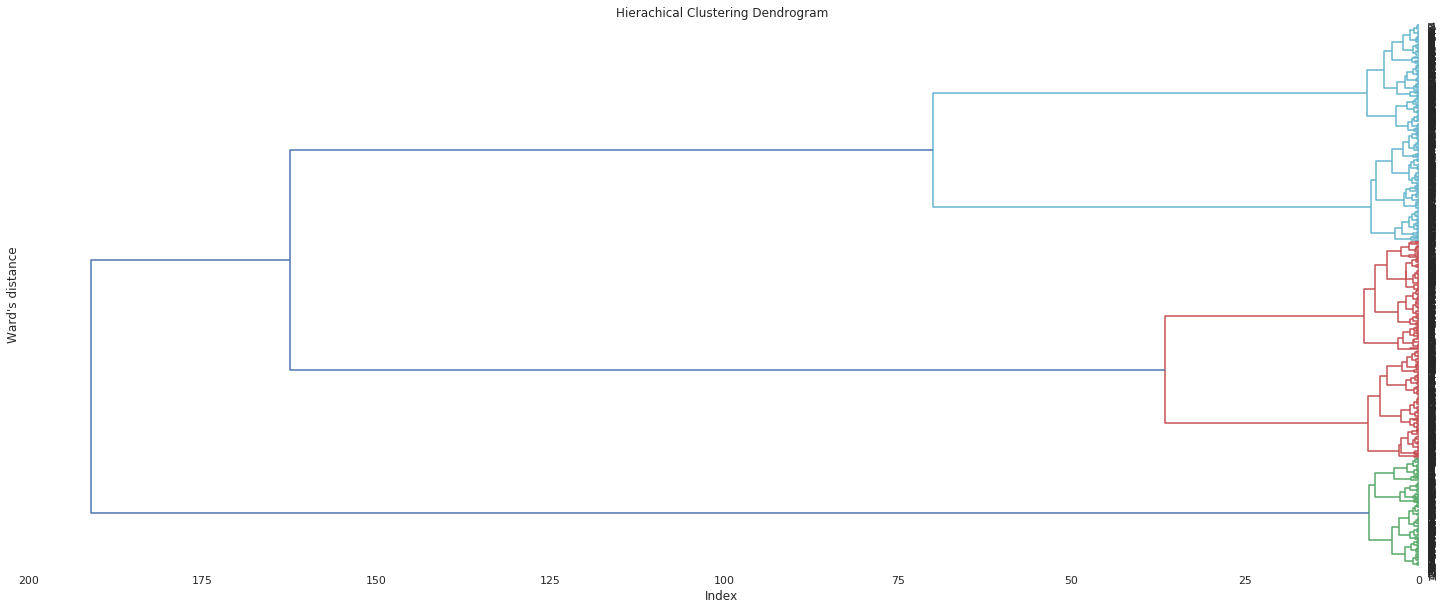

In [0]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, orientation="left",
           leaf_rotation=90.,
           leaf_font_size=9.,);


# Truncating Dendrogram

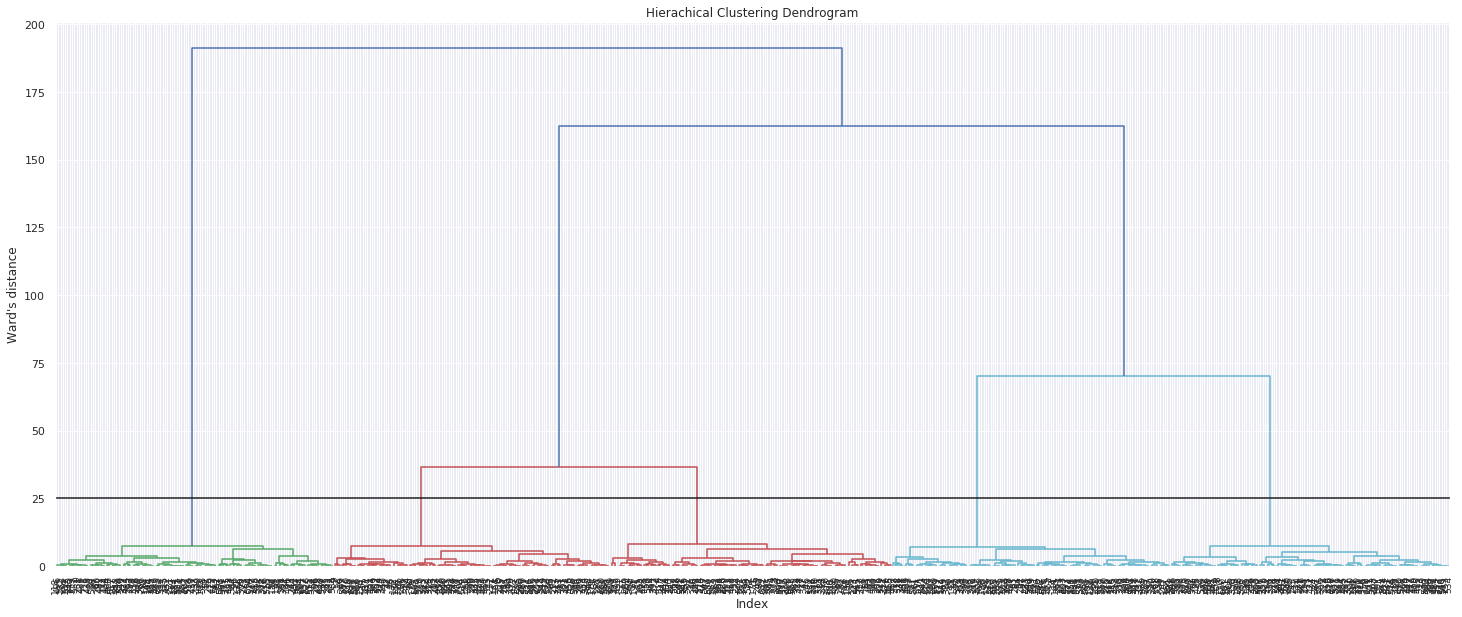

In [0]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k');

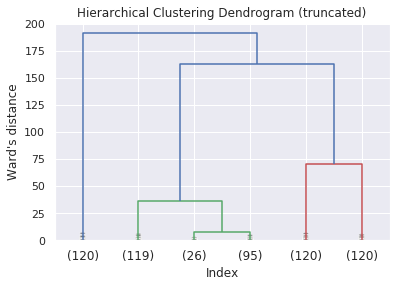

In [0]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);

### By distance

In [0]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

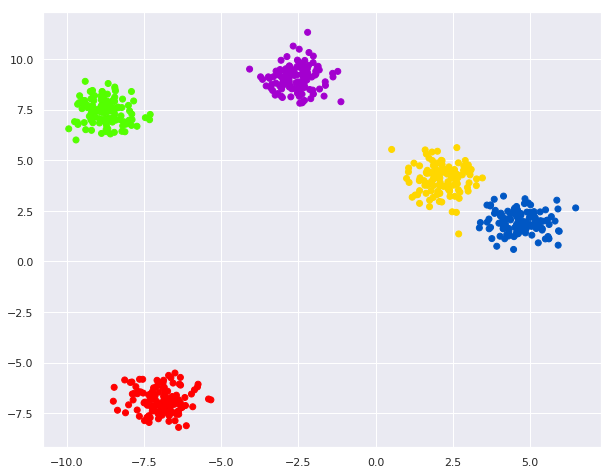

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

### By Clusters

In [0]:
k = 5
clusters = fcluster(distance, k, criterion='maxclust')

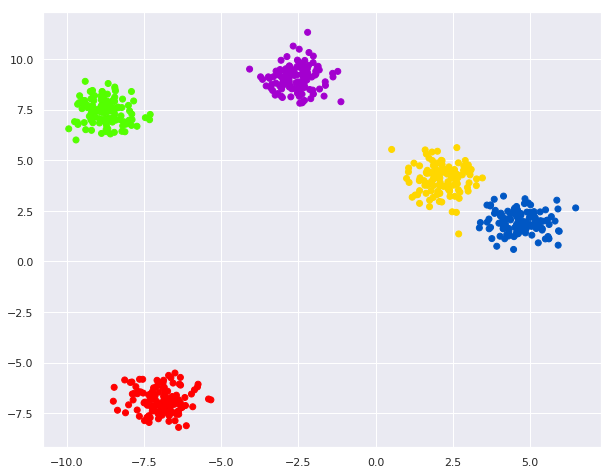

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');


# k-Means Clustering


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
y_kmeans = kmeans.predict(X)

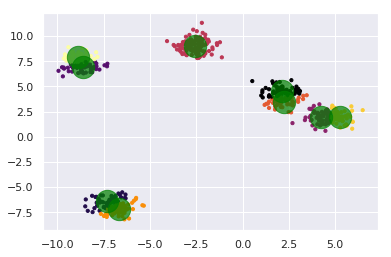

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

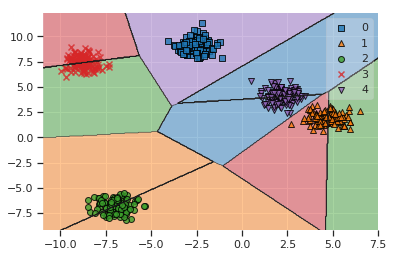

In [0]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans);


# Elbow Method


In [0]:
kmeans.inertia_

287.22306344369366

In [0]:
sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

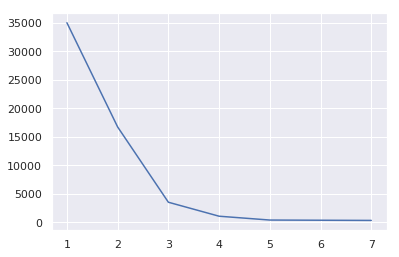

In [0]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);



# 8.0 Silhouette Analysis


In [0]:
from sklearn.metrics import silhouette_score

In [0]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

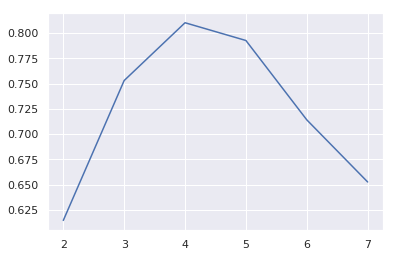

In [0]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

****

# Mean Shift

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [0]:
from itertools import cycle

In [0]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [0]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [0]:
cluster_centers = meanshift_model.cluster_centers_

In [0]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [0]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 5


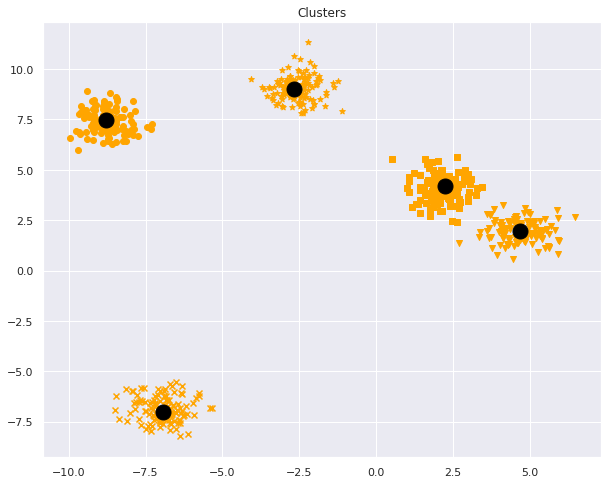

In [0]:
plt.figure(figsize=(10,8))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');

***